# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

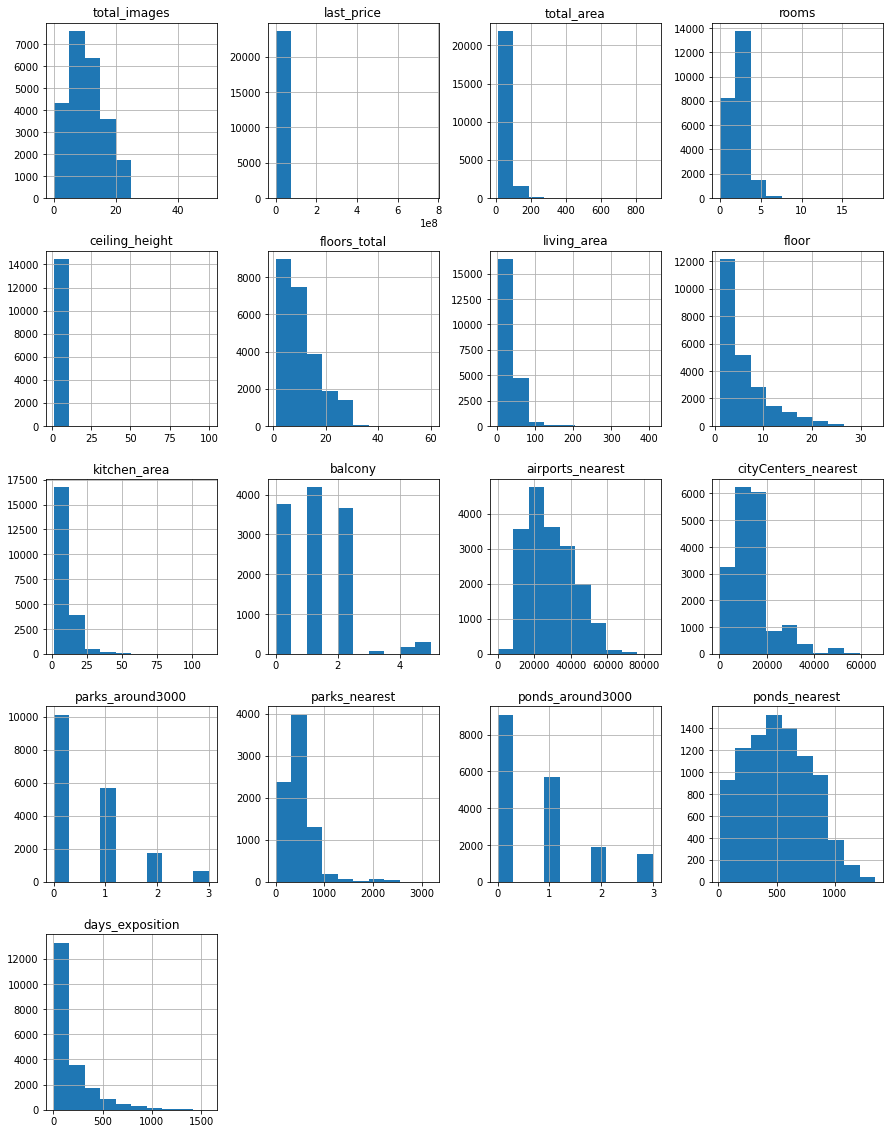

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t',decimal='.')
data.info()
data.hist(figsize=(15,20))
plt.show()

Вывод:
    столбец first_day_exposition, дата публикации, должен иметь тип datetime;
    floor_total, число этажей, должен иметь тип int
    is apartament, апартаменты, должен иметь тип bool
    balcony, число балконов, должен иметь тип int
    park_around3000, число парков в радиусе 3 км, должен иметь тип int
    pounds_around3000, число парков в радиусе 3 км, должен иметь тип int
    days_exposition, сколько дней было размещено, должен иметь тип int

### Предобработка данных

In [2]:
print(data.isna().sum())#подсчет количества пропущенных значений в каждом столбце
data.describe()#числовое описание данных

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [4]:
data.loc[data['ceiling_height']>10,'ceiling_height']=data.loc[data['ceiling_height']>10,'ceiling_height']/10 #убрали аномальную высоту потолков
try:
    data['floors_total']=data['floors_total'].astype('int')
except:
    data['floors_total']=data['floors_total'].fillna(data['floor'])#поменяли тип данных на целый и заполнили пропуски
data['balcony'] = data['balcony'].fillna(0).astype('int')#поменяли тип данных на целый, пропуски заполнили 0
data['parks_around3000']=data['parks_around3000'].fillna(0).astype('int',errors='ignore')#заполнили пропуски 0, поменяли тип данных
data['ponds_aroud3000']=data['ponds_around3000'].fillna(0).astype('int',errors='ignore')#заполнили пропуски медианным значением, поменяли тип данных
data['days_exposition']=data['days_exposition'].astype('int',errors='ignore')#заполнили пропуски медианным значением, поменяли тип данных
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

len(data['locality_name'].unique())#находим количество уникальных значений в столбце название населенного пункта, 365 значений
data['locality_name']=data['locality_name'].str.replace('посёлок','поселок')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа','поселок')#устраняем неявные дубликаты
len(data['locality_name'].unique())#находим количество уникальных значений, после устранения неявных дубликатов, 330

330

In [5]:
data.duplicated().sum()#проверка на явные дубликаты

0

Вывод: Пропуски есть в столбцах:
- ceiling_height - высота потолков в м, максимальное значение в 100 м некорректно. Аномалии больше 10 м, нужно разделить на 10.Пропуски оставляем 
- floors_total - количество этажей в доме, должен иметь тип int. Пропуски логично заменить значением из столбца floor, так как там пропусков и аномалий нет.
- living_area - жилая площадь в м2. Аномалий нет. Пропуски оставляем
- is_apartment - апартаменты. Пропуски оставляем
- kitchen_area - площадь кухни в м2. Пропуски оставляем
- balcony - число балконов. Должен иметь тип int. Пропуски заполняем 0
- locality_name - название населенного пункта. Пропуски оставляем. Неявные дубликаты обрабатывем.
- airports_nearest - расстояние до аэропорта в м. Пропуски оставляем
- cityCenters_nearest - расстояние до центра города в м. Пропуски оставляем
- parks_around3000 - число парков в радиусе 3 км. Должен иметь тип int. Пропуски заменим на 0. Аномалий нет
- parks_nearest - расстояние до ближайшего парка в м. Пропуски оставляем
- ponds_around3000 -число водоемов в радиусе 3км. Должен иметь тип int. Пропуски заменим на 0
- ponds_nearest - расстояние до ближайшего водоема в м. Пропуски заменим на медианное. Аномалий нет
- days_exposition - сколько дней было размещено объявление. Должен иметь тип int.Пропуски оставляем. Аномалий нет
- first_day_exposition, дата публикации, должен иметь тип datetime;
Нашли и устранили 35 неявных дубликаты в столбце "locality_name". Дубликаты случайные, вызваны человеческим фактором. Явных дубликатов нет

### Посчитайте и добавьте в таблицу новые столбцы

In [6]:
data['price_1m^2']=data['last_price']/data['total_area'] #считаем стоимость 1м2
data['week_day_exposition']=data['first_day_exposition'].dt.weekday #день недели
data['month_exposition']=data['first_day_exposition'].dt.month #месяц публикации
data['year_exposition']=data['first_day_exposition'].dt.year #год публикации
data['city_centers_nearest_km']=data['cityCenters_nearest']/1000#расстояние до центра города в км
def floor_category(row):
    floors_total=row['floors_total']
    floor=row['floor']
    if floor==1:
        return'первый'
    elif floor==floors_total:
        return 'последний'
    elif 1<floor<floors_total:
        return 'другой'
data['floor_category']=data.apply(floor_category,axis=1)#тип этажа квартиры

### Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

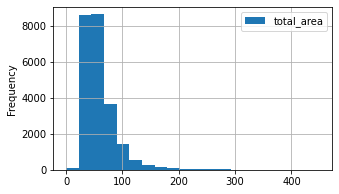

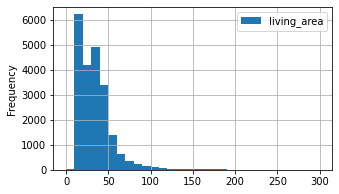

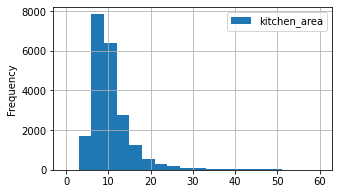

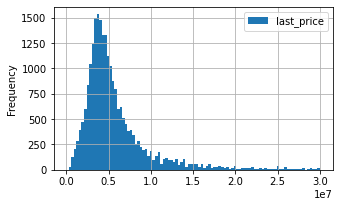

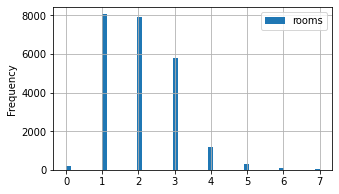

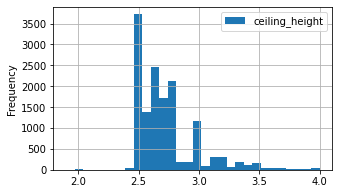

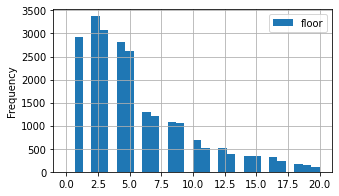

In [7]:
data.plot(y='total_area', kind='hist',grid=True, range=(0,450),bins=20, figsize=(5,3))
data.plot(y='living_area', kind='hist',grid=True,range=(0,300),figsize=(5,3), bins=30)
data.plot(y='kitchen_area',kind='hist',grid=True,range=(0,60),bins=20,figsize=(5,3))
data.plot(y='last_price',kind='hist',grid=True,range=(0,30000000),bins=100,figsize=(5,3))
data.plot(y='rooms',kind='hist',grid=True,range=(0,7),bins=50,figsize=(5,3))
data.plot(y='ceiling_height',kind='hist',grid=True,range=(1.9,4),bins=30,figsize=(5,3))
data.plot(y='floor',kind='hist',grid=True,range=(0,20),bins=30,figsize=(5,3))


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ponds_aroud3000,price_1m^2,week_day_exposition,month_exposition,year_exposition,city_centers_nearest_km
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.728100,10.671463,34.457852,5.892358,10.569807,0.591080,...,490.804555,0.770255,517.980900,180.888634,0.590911,9.942166e+04,2.569307,6.400101,2017.367146,14.191278
std,5.682529,1.088701e+07,35.654083,1.078405,0.299855,6.595802,22.030445,4.885249,5.905438,0.959298,...,342.317995,0.938346,277.720643,219.727988,0.883999,5.030680e+04,1.789082,3.491561,1.039771,8.608386
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.181000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,0.000000,7.658547e+04,1.000000,3.000000,2017.000000,9.238000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,502.000000,95.000000,0.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.098500
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,1.000000,1.142563e+05,4.000000,10.000000,2018.000000,16.293000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,3.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.968000


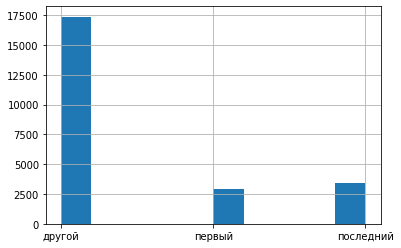

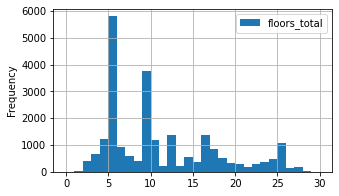

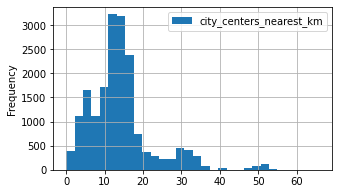

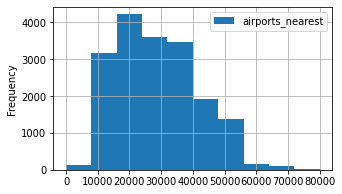

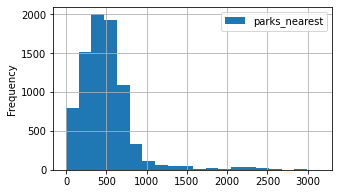

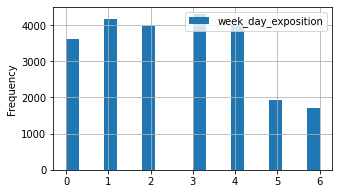

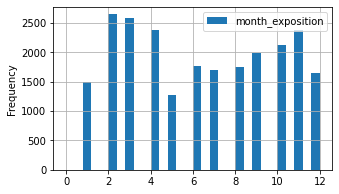

In [8]:
data['floor_category'].hist(bins=10)
data.plot(y='floors_total',kind='hist',grid=True,range=(0,30),bins=30,figsize=(5,3))
data.plot(y='city_centers_nearest_km',kind='hist',grid=True,range=(0,66),bins=30,figsize=(5,3))
data.plot(y='airports_nearest',kind='hist',grid=True,range=(0,80000),bins=10,figsize=(5,3))
data.plot(y='parks_nearest',kind='hist',grid=True,range=(0,3150),bins=20,figsize=(5,3))
data.plot(y='week_day_exposition',kind='hist',grid=True,range=(0,6),bins=20,figsize=(5,3))
data.plot(y='month_exposition',kind='hist',grid=True,range=(0,12),bins=30,figsize=(5,3))
data.describe()

4.1. Вывод: изучив детально данные мы видим:
- нормальное распределение всех рассматриваемых данных. Чаще всего встречаются значения, близкие к среднему
- аномалии присутствуют только в значениях:
минимальное расстояние до аэропорта 0 км. Скорее всего это ошибка, так как сложно представить квартиру, которая находится на территории аэропорта.
высота потолков. Имеются значения равные 1 м и 100 м в исходных данных.
минимальная стоимость в данных 12000р, что намного меньше медианной стоимости 1м2.
- Выделим основные характеристики данного рынка недвижимости: чаще всего встречаются квартиры с 1 и 2 комнатами на некрайних этажах, где их
средняя стоимость 6.5 млн., медианная - 4,65 млн.;
cредняя площадь 60 м2, медианная - 52 м2;
среднее количество этажей в зданиях 11, медианное - 9;
средння отдаленность от центра города 14.1 км, медианная - 13.1 км;
средння отдаленность от аэропорта 28.8 км, медианная - 26.7 км;
средняя отдаленность от парка 467 м, медианная - 455 м
средняя высота потолков 2.72 м, медианная - 2.65 м.
Чаще всего объявления публикуют в будние дни, в феврале и  в марте. Реже всего в выходные, в январе и в мае.


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

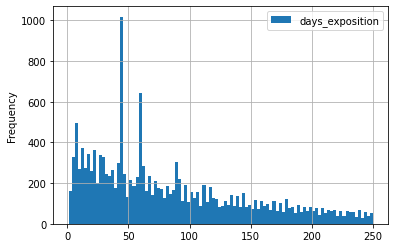

In [9]:
data['days_exposition'].plot(kind='hist',bins=100,range=(1,250),grid=True,legend=True)
print(data['days_exposition'].describe())
data['days_exposition'].value_counts()

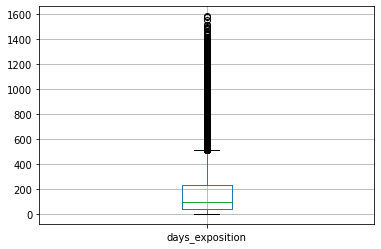

In [10]:
data.boxplot(column='days_exposition')
plt.show()

4.2. Вывод: По гистограмме видим распределение Пуассона. Среднее число дней с момента публикации до продажи 180, медианное 95. На отметках 45, 60 и 90 дней есть аномально большое количество закрытий объявлений.Вероятно это связано с условиями размещения объявлений на платформе, нужно уточнить их. По диаграмме размаха видимо, что грань выбросов минимальных значений находится на значении 0, значит быстрыми можно считать продажи, которые заняли меньше 1 дня. Необычно долгими можно считать продажи длительностью от 500 дней.

In [11]:
print(data['last_price'].corr(data['total_area']))
print(data['last_price'].corr(data['living_area']))
print(data['last_price'].corr(data['kitchen_area']))
print(data['last_price'].corr(data['rooms']))
print(data['last_price'].corr(data['floor']))
print(data['last_price'].corr(data['week_day_exposition']))
print(data['last_price'].corr(data['month_exposition']))
print(data['last_price'].corr(data['year_exposition']))

0.6536750579657242
0.5664915336952651
0.5198690130216392
0.3633428499648948
0.0265756432844708
0.0015501452176215407
0.0027791287507397166
-0.043089036199508615


<AxesSubplot:xlabel='last_price', ylabel='year_exposition'>

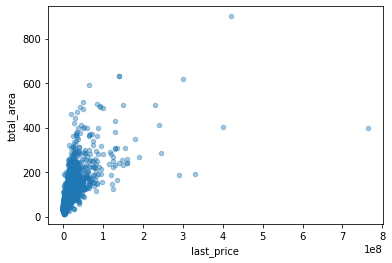

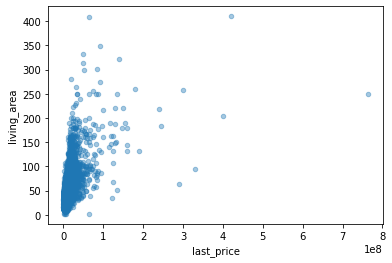

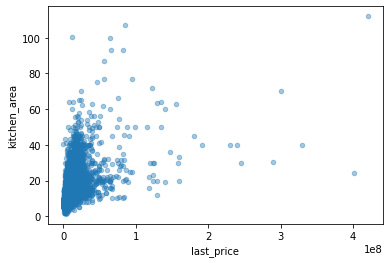

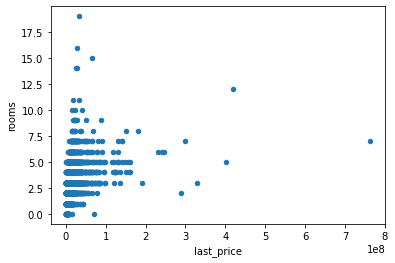

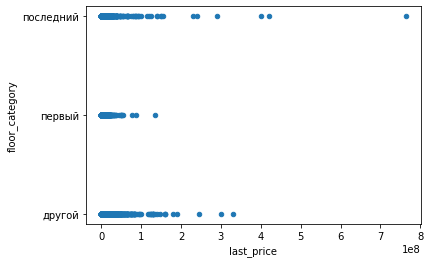

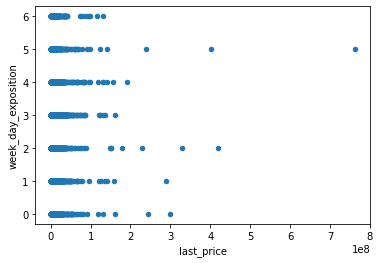

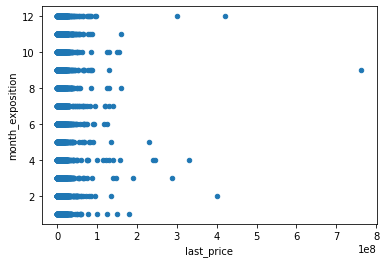

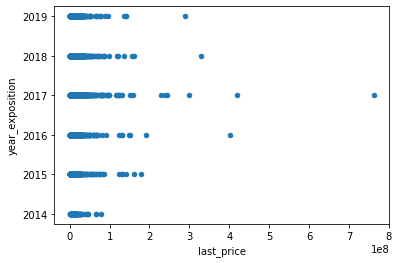

In [12]:
data.plot(x='last_price',y='total_area',kind='scatter',alpha=0.4)
data.plot(x='last_price',y='living_area',kind='scatter',alpha=0.4)
data.plot(x='last_price',y='kitchen_area',kind='scatter',alpha=0.4)
data.plot(x='last_price',y='rooms',kind='scatter')
data.plot(x='last_price',y='floor_category',kind='scatter')
data.plot(x='last_price',y='week_day_exposition',kind='scatter')
data.plot(x='last_price',y='month_exposition',kind='scatter')
data.plot(x='last_price',y='year_exposition',kind='scatter')


Вывод 4.3. Судя по диаграмам рассеяния, коэфицентам корреляции Пирсона между ценой и рассматриваемыми параметрами мы видим, что цена зависит от
- общей площади квартиры. Положительная корреляция 0.65
- жилой площади. Положительная корреляция 0.57
- площади кухни. Положительная корреляция 0.52
- количества комнат. Положительная корреляция 0.36

от остальных рассматриваемых параметров (этажа, дня, месяца и года размещения объявления) стоимость квартиры не зависит

In [13]:
locality_table=data.pivot_table(index='locality_name',values='price_1m^2',aggfunc=['count','mean'])
locality_table.columns = ['count', 'mean']
locality_table=locality_table.sort_values('count',ascending=False)
print(locality_table.head(10))
print(locality_table['mean'].max())
print(locality_table['mean'].min())


                   count           mean
locality_name                          
Санкт-Петербург    15721  114849.008794
поселок Мурино       556   85681.762601
поселок Шушары       440   78677.364217
Всеволожск           398   68654.473986
Пушкин               369  103125.819291
Колпино              338   75424.579098
поселок Парголово    327   90175.913458
Гатчина              307   68746.146763
деревня Кудрово      299   92473.547576
Выборг               237   58141.909153
115122.79919757204
11206.221198156682


Вывод 4.4. Самая высокая стоимость квадратного метра в 10 населенных пунктах с наибольшим числом объявлений в Санкт-Петербурге. Самая низкая в Выборге.

                         mean_price_1m^2
city_centers_nearest_km                 
0                          187324.130319
1                          166603.755531
2                          146662.860056
3                          129416.344615
4                          137475.497055
5                          146979.232519
6                          152277.893519
7                          141399.731456
8                          120581.349830
9                          110012.549686
10                         111641.287182
11                         106790.883882
12                         108295.769255
13                         107209.143992
14                         104986.483351
15                         101883.116013
16                         100085.601721
17                          94095.872357
18                          94831.953162
19                          95434.377295
20                         107046.166047
21                          91492.688149
22              

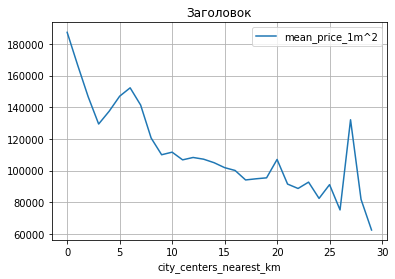

In [14]:
data['city_centers_nearest_km']=data['city_centers_nearest_km'].fillna(99999).astype('int')
data_piter=data.query('city_centers_nearest_km != 99999 and locality_name=="Санкт-Петербург"')
data_piter_table=data_piter.pivot_table(index='city_centers_nearest_km',values='price_1m^2',aggfunc='mean')
data_piter_table.columns=['mean_price_1m^2']
print(data_piter_table)
print(data_piter_table['mean_price_1m^2'].mean()/27)#средняя цена каждого км

data_piter_table.plot(legend=True, grid = True, title = 'Заголовок')
print(data_piter['price_1m^2'].corr(data_piter['city_centers_nearest_km']))#Коэффицент корреляции между ценой за м^2 и отдаленностью от центра

In [15]:
data_piter_table1=data_piter.pivot_table(index='city_centers_nearest_km',values='price_1m^2',aggfunc=['mean','count'])
print(data_piter_table.tail(5))

                         mean_price_1m^2
city_centers_nearest_km                 
25                          91136.018511
26                          75171.911041
27                         132115.709459
28                          81840.638722
29                          62482.404228


In [16]:
print(data_piter.query('city_centers_nearest_km==27'))#изучим характеристики квартир на отдалении 27 км от центра

      total_images  last_price  total_area first_day_exposition  rooms  \
748             13  14350000.0        74.0           2017-11-28      2   
5961             6   2250000.0        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
748             3.13           5.0         30.0      3          NaN  ...   
5961             NaN           2.0         16.5      2          NaN  ...   

      ponds_around3000  ponds_nearest  days_exposition  ponds_aroud3000  \
748                0.0            NaN            128.0                0   
5961               0.0            NaN            178.0                0   

         price_1m^2  week_day_exposition  month_exposition  year_exposition  \
748   193918.918919                    1                11             2017   
5961   70312.500000                    1                 2             2018   

      city_centers_nearest_km  floor_category  
748                        27       

# Вывод
- Средняя цена каждого км равняется 4159.
- Коэффицент корреляции между ценой за м^2 и отдаленностью от центра отрицательный, равняется -0.31. Чем дальше от центра, тем дешевле стоит квартира. Однако видим аномально высокую среднюю цену 1 м^2 квартир, у которых расстояние до центра 27 км. Таких квартир всего 2, из них у 1 квартиры стоимость 1м^2 равняется 193918, что влияет на среднюю цену в сторону увеличения. Для выяснения причины нужно больше данных. (Возможно, распололжение квартиры в дорогостоящем районе, курортной зоне и т.д.)

### Общий вывод

1. Изучив исходные данные мы обнаружили некоторые особенности:
- высота потолков в некоторых объектах была указана больше 10 м. Скорее всего подразумевались не целые числа, а десятичные. Поэтому делим эти значения на 10
- неявные дубликаты в названиях населенных пунктов, которые в дальнейшем устранили
2. После предобработки данных видим:
- видим нормальное распределение во всех исходных данных
- аномальное расстояние до аэропорта в 0 км.
- минимальную стоимость квартиры 12000.
3. В таблицу добавили столбцы 'price_1m^2' - стоимость 1 кв. м , 'week_day_exposition' - день недели публикации объявления,'month_exposition' - месяц публикации, 'year_exposition' - год публикации, 'floor_category' - тип этажа квартиры,'city_centers_nearest_km' - расстояние до центра в км
4. -  Проведя исследовательский анализ даных мы можем выделить основные характеристики нашего архива объявлеий: чаще всего встречаются квартиры с 1 и 2 комнатами на некрайних этажах, где их средняя стоимость 6.5 млн., медианная - 4,65 млн.; cредняя площадь 60 м2, медианная - 52 м2; среднее количество этажей в зданиях 11, медианное - 9; средння отдаленность от центра города 14.1 км, медианная - 13.1 км; средння отдаленность от аэропорта 28.8 км, медианная - 26.7 км; средняя отдаленность от парка 467 м, медианная - 455 м средняя высота потолков 2.72 м, медианная - 2.65 м. Чаще всего объявления публикуют в будние дни, в феврале и в марте. Реже всего в выходные, в январе и в мае.
-  Построив гистограмму и диаграмму размаха по столбцу 'day_exposition' видим распределения Пуассона, грань выбросов находится на значениях 0 и 500, значит быстрыми можно считать продажи, которые заняли меньше 1 дня. Необычно долгими можно считать продажи длительностью от 500 дней
- Судя по диаграмам рассеяния, коэфицентам корреляции Пирсона между ценой и рассматриваемыми параметрами мы видим, что цена зависит:
от общей площади квартиры, положительная корреляция 0.65,
жилой площади, положительная корреляция 0.57,
площади кухни, положительная корреляция 0.52,
количества комнат,
положительная корреляция 0.36.
От остальных рассматриваемых параметров (этажа, дня и месяца размещения объявления) стоимость квартиры не зависит
- Рассмотрев 10 населенных пунктов с наибольшим числом объявлений, обнаружили, что самая высокая стоиомость 1 кв. м в Санкт-Петербурге, равняется 114849. Самая низкая - в Выборге, равняется 58142.
- Средняя цена за каждый километр отдаленности от центра равняется 4159. Коэффицент корреляции между ценой за м^2 и отдаленностью от центра отрицательный, равняется -0.31. Чем дальше от центра, тем дешевле стоит квартира.